In [ ]:
#using parabolic approximation as model

#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift
from scipy import signal
from scipy.signal import stft

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras as keras
import tensorflow as tf

from sympy.solvers import solve
from sympy import Symbol

from math import sqrt
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data from excel sheet
xls = pd.ExcelFile('//content/drive/MyDrive/Testdaten.xlsx')
dataframes = [pd.read_excel(xls, f'Test{i}') for i in range(1, 8)]

final_arrays = [df['Hammer P'] for df in dataframes]
df_num=7

In [ ]:
# Use STFT on Data
stft_data = []
for i in range(df_num):
  _, _, stft_values = stft(final_arrays[i],fs=20, nperseg=300, noverlap=150)
  stft_data.append(stft_values)


In [ ]:
stft_abs = []

# Durchlaufe jedes Element in stft_data und wende np.abs an
for stft_values in stft_data:
    stft_abs_values = np.abs(stft_values)
    stft_abs.append(stft_abs_values)

0.0 52.5 75.0
0.0 37.5 75.0
0.0 30.0 75.0
Vorhergesagter Nullpunkt: 114.145367802396
RMSE: 0.48761395346034325
0.0 67.5 97.5
0.0 52.5 97.5
0.0 45.0 105.0
Vorhergesagter Nullpunkt: 127.292502694850
RMSE: 0.6549122480134094
0.0 97.5 142.5
0.0 75.0 135.0
0.0 60.0 150.0
Vorhergesagter Nullpunkt: 266.953018155400
RMSE: 0.5469895794045518
0.0 105.0 150.0
0.0 75.0 142.5
0.0 60.0 150.0
Vorhergesagter Nullpunkt: 227.421923639935
RMSE: 0.6493446249708391
0.0 90.0 135.0
0.0 67.5 127.5
0.0 52.5 135.0
Vorhergesagter Nullpunkt: 189.976628800404
RMSE: 0.8438886711218793
0.0 142.5 210.0
0.0 105.0 195.0
0.0 90.0 217.5
Vorhergesagter Nullpunkt: 356.436327396780
RMSE: 0.7222578062115091
0.0 150.0 217.5
0.0 112.5 210.0
0.0 90.0 225.0
Vorhergesagter Nullpunkt: 321.227679801011
RMSE: 0.8045039337348051


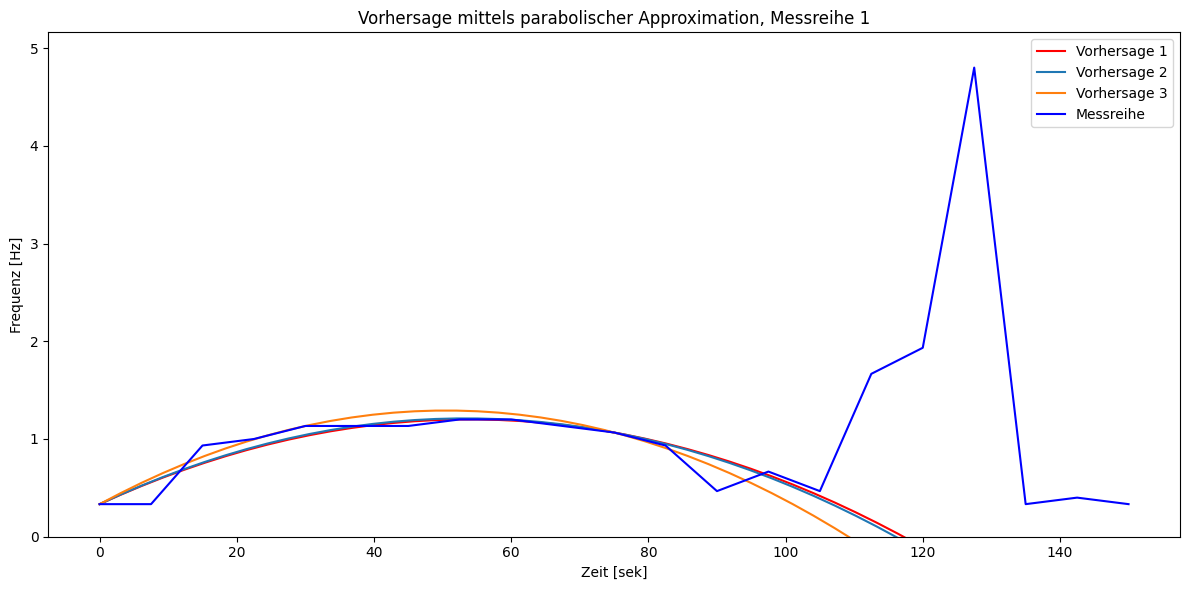

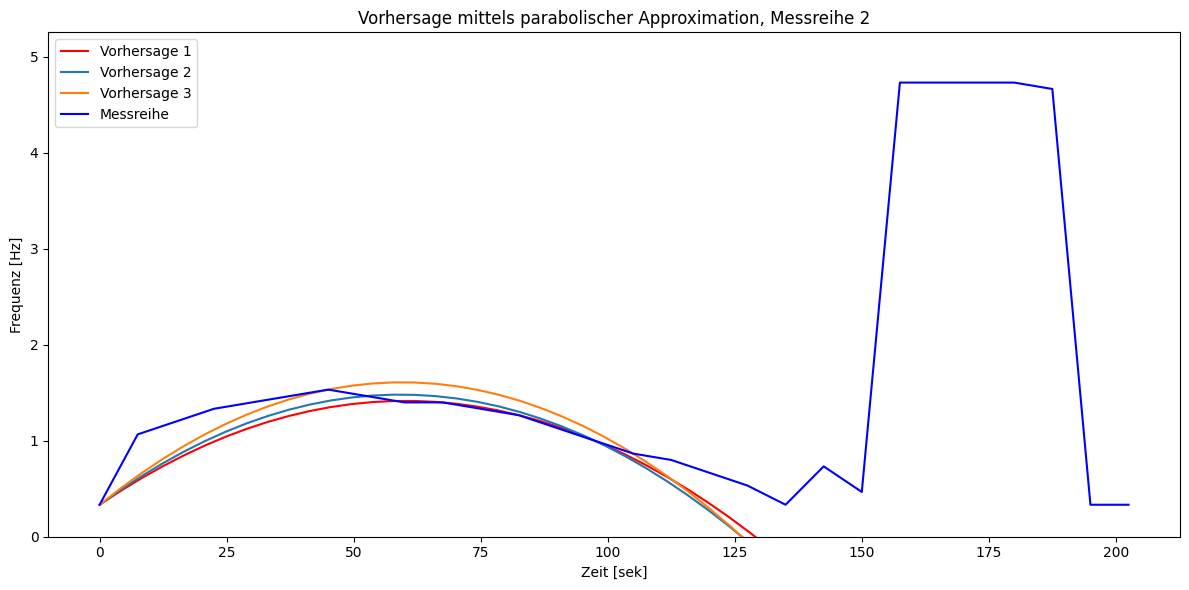

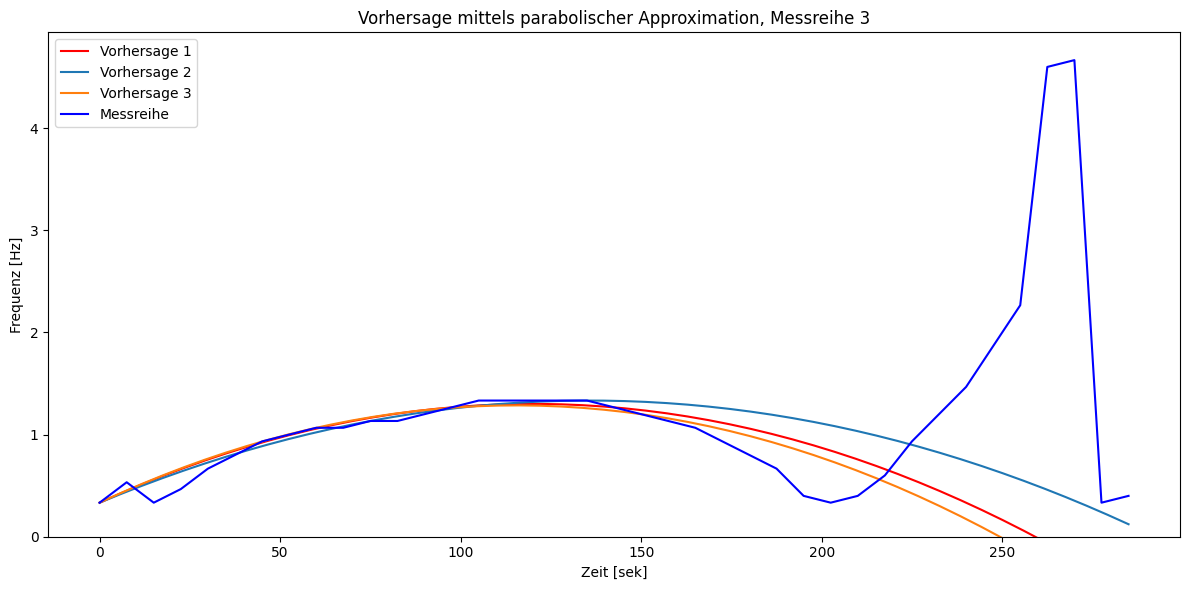

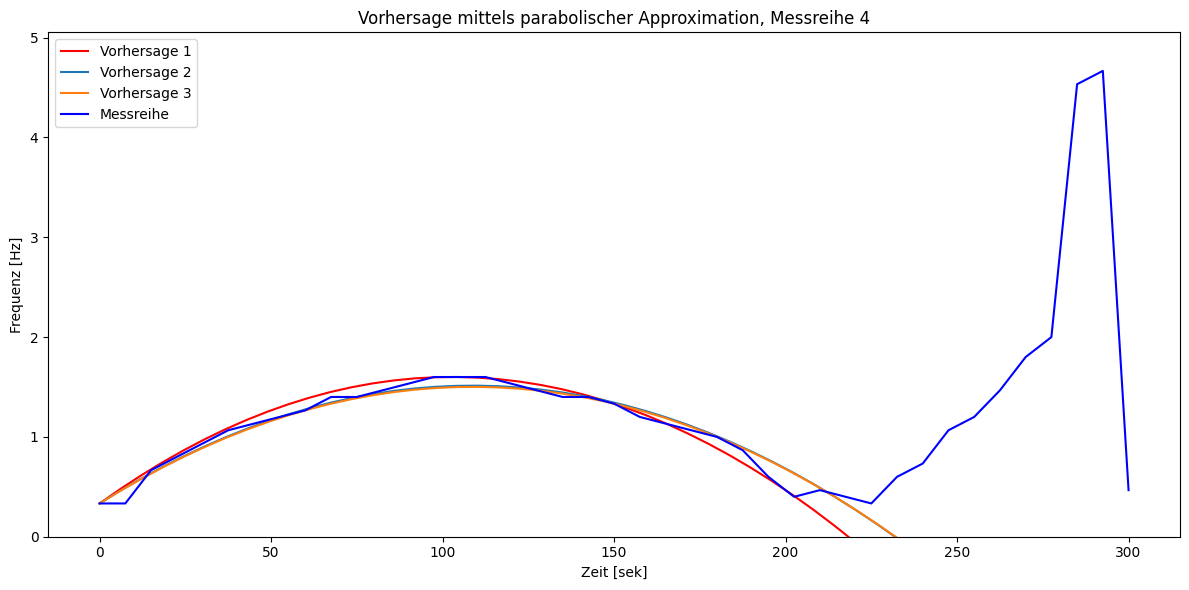

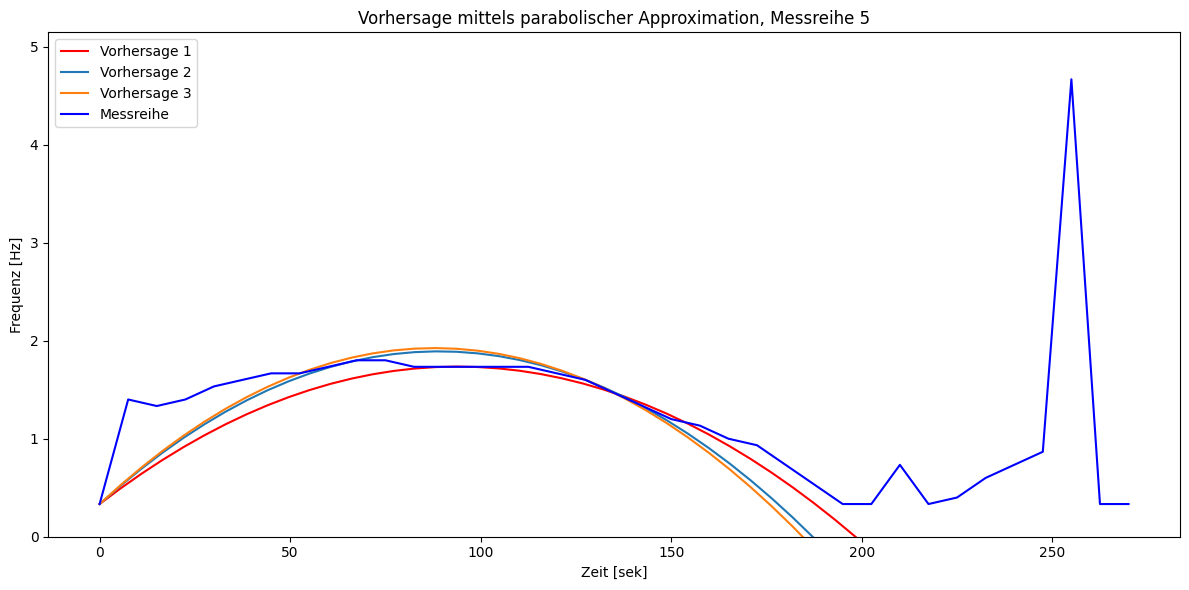

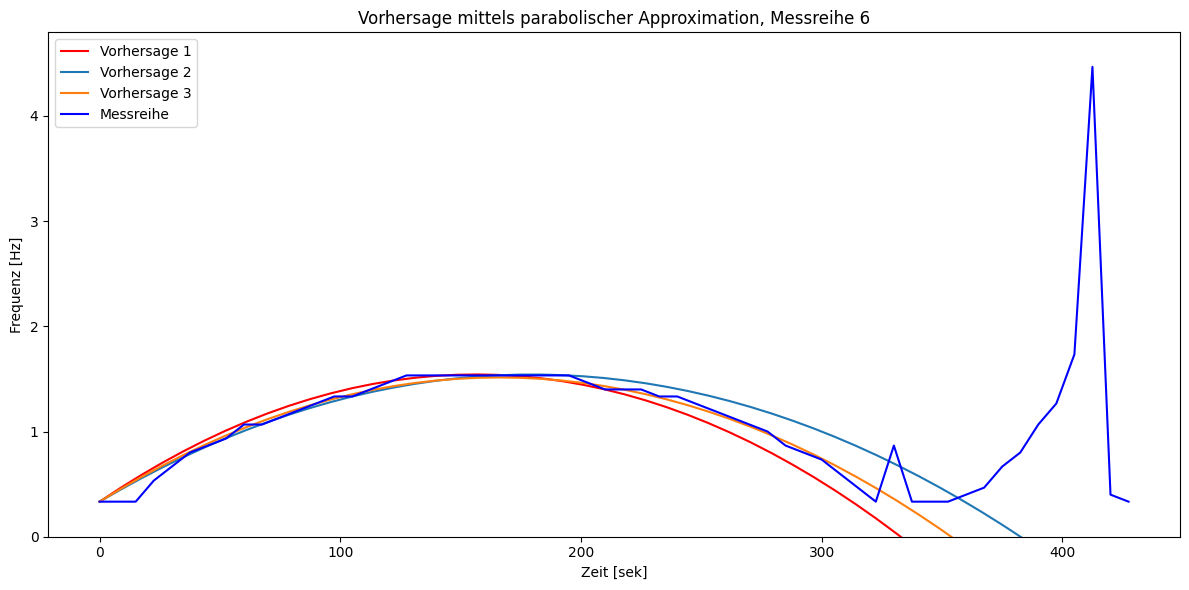

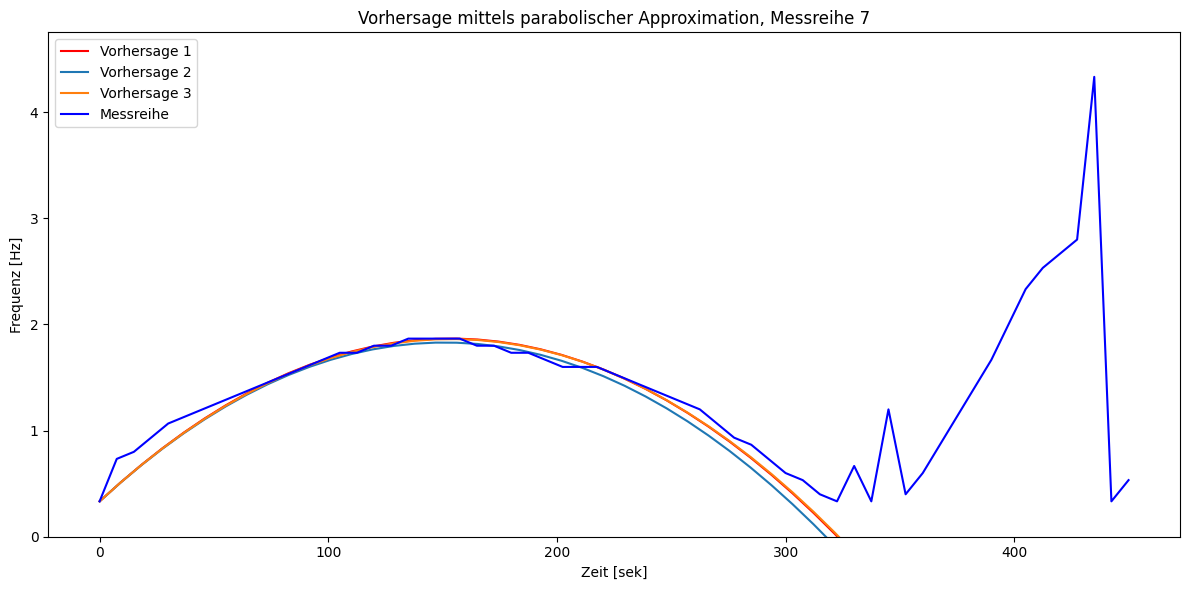

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sympy import Symbol, solve
from math import sqrt
from sklearn.metrics import mean_squared_error

def calc_parabola_vertex(x1, y1, x2, y2, x3, y3):
    denom = (x1-x2) * (x1-x3) * (x2-x3);
    A     = (x3 * (y2-y1) + x2 * (y1-y3) + x1 * (y3-y2)) / denom;
    B     = (x3 * x3 * (y1-y2) + x2*x2 * (y3-y1) + x1*x1 * (y2-y3)) / denom;
    C     = (x2 * x3 * (x2-x3) * y1+x3 * x1 * (x3-x1) * y2+x1 * x2 * (x1-x2) * y3) / denom;

    return A, B, C

critical_values = [13, 17, 25, 27, 28, 27, 42]

for i in range(df_num):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(12, 6))
    f, t, Zxx = signal.stft(final_arrays[i], fs=20, nperseg=300, noverlap=150)
    threshold = 0.3
    Zxx[f < threshold, :] = 0
    dominant_freqs = f[np.argmax(np.abs(Zxx), axis=0)]
    size = dominant_freqs.size
    print(t[0], t[round(size / 3)], t[round(size / 2.1)])
    a1, b1, c1 = calc_parabola_vertex(t[0], dominant_freqs[0], t[round(size / 3)], dominant_freqs[round(size / 3)],
                                     t[round(size / 2.1)], dominant_freqs[round(size / 2.1)])

    x = np.linspace(t[0], t[-1])

    yy = a1 * x**2 + b1 * x + c1

    plt.plot(x, yy, label='Vorhersage 1', color='red')

    x = Symbol('x')

    x_solved1 = solve(a1 * x**2 + b1 * x + c1, x)

    print(t[0], t[round(size / 4)], t[round(size / 2.2)])
    a2, b2, c2 = calc_parabola_vertex(t[0], dominant_freqs[0], t[round(size / 4)], dominant_freqs[round(size / 4)],
                                      t[round(size / 2.2)], dominant_freqs[round(size / 2.2)])

    x = np.linspace(t[0], t[-1])

    yy = a2 * x**2 + b2 * x + c2

    plt.plot(x, yy, label='Vorhersage 2')

    x = Symbol('x')
    x_solved2 = solve(a2 * x**2 + b2 * x + c2, x)

    print(t[0], t[round(size / 5)], t[round(size / 2)])
    a3, b3, c3 = calc_parabola_vertex(t[0], dominant_freqs[0], t[round(size / 5)], dominant_freqs[round(size / 5)],
                                      t[round(size / 2)], dominant_freqs[round(size / 2)])

    x = np.linspace(t[0], t[-1])

    yy = a3 * x**2 + b3 * x + c3

    plt.plot(x, yy, label='Vorhersage 3')

    x = Symbol('x')
    x_solved3 = solve(a3 * x**2 + b3 * x + c3, x)

    plt.plot(t, dominant_freqs, label='Messreihe', color='blue')

    predicted_x = (x_solved1[1] + x_solved2[1] + x_solved3[1]) / 3
    print('Vorhergesagter Nullpunkt:', predicted_x)

    end = dominant_freqs.size
    x_values = np.linspace(0, end, end)
    parabola_values = ((a1 * x_values**2 + b1 * x_values + c1) + (a2 * x_values**2 + b2 * x_values + c2) +
                      (a3 * x_values**2 + b3 * x_values + c3)) / 3

    rmse = sqrt(mean_squared_error(dominant_freqs[:critical_values[i]], parabola_values[:critical_values[i]]))
    print(f'RMSE: {rmse}')

    plt.title(f'Vorhersage mittels parabolischer Approximation, Messreihe {i+1}')
    plt.ylabel('Frequenz [Hz]')
    plt.xlabel('Zeit [sek]')
    plt.legend()
    plt.ylim(0,)
    plt.tight_layout()

plt.show()


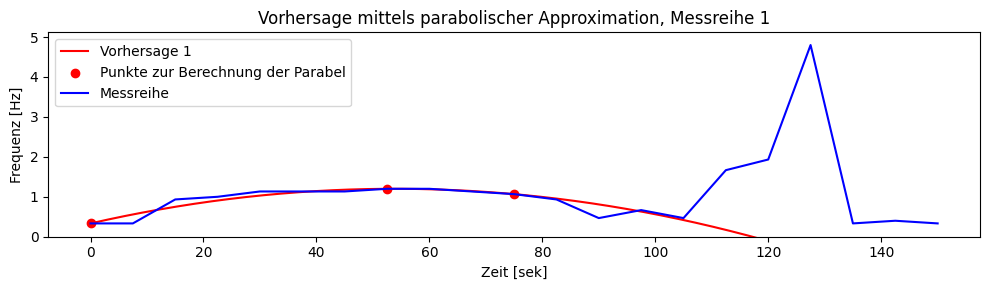

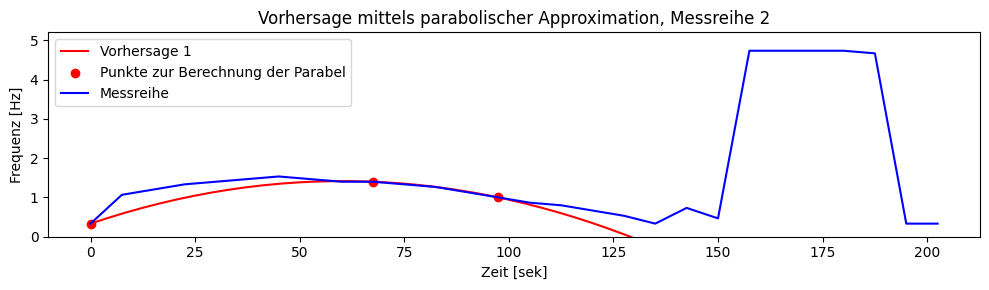

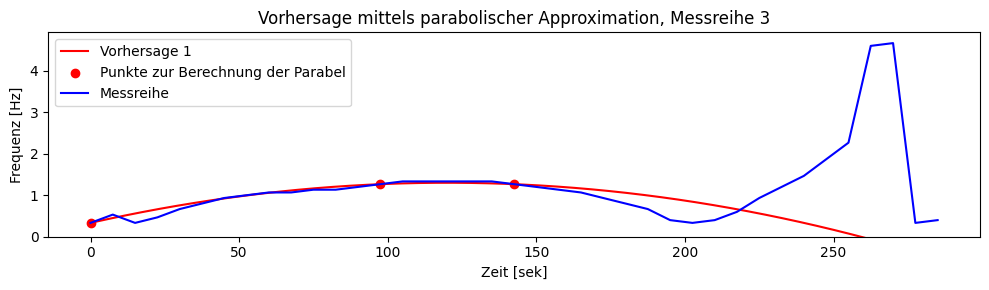

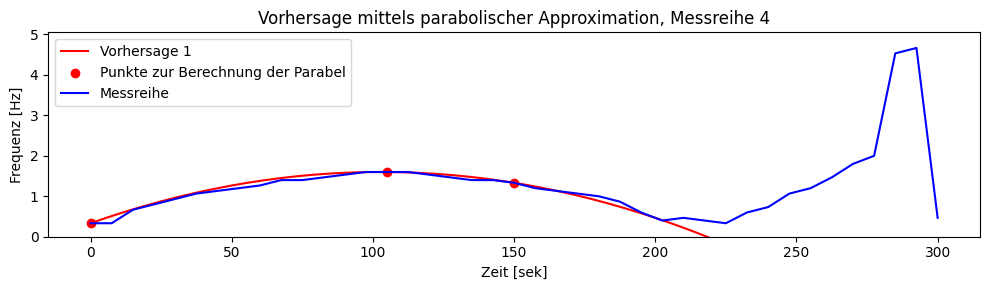

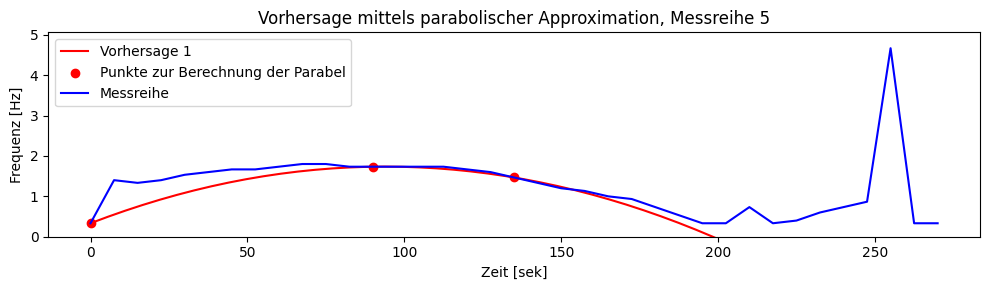

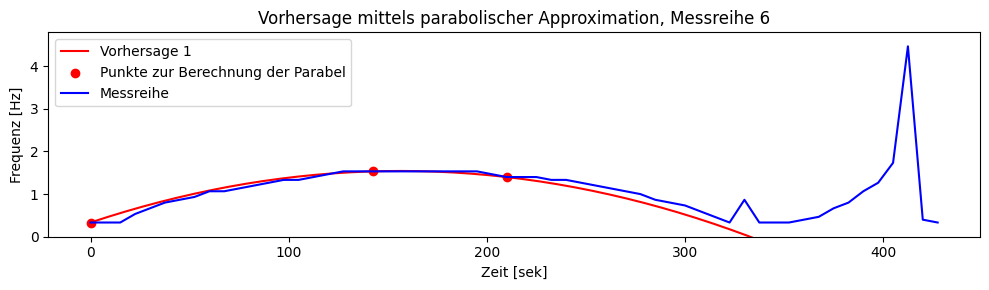

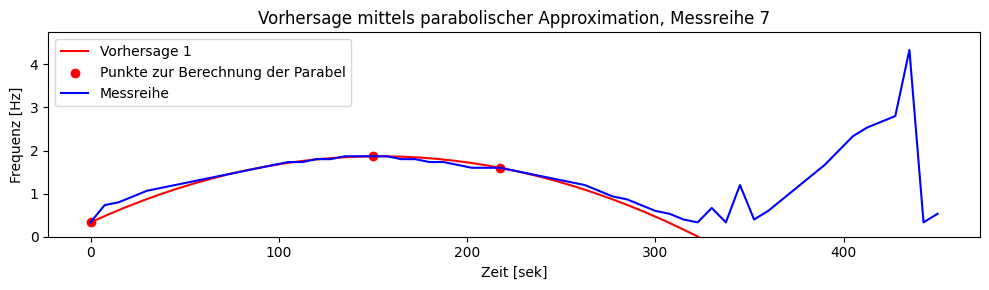

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sympy import Symbol, solve
from math import sqrt
from sklearn.metrics import mean_squared_error

def calc_parabola_vertex(x1, y1, x2, y2, x3, y3):
    denom = (x1-x2) * (x1-x3) * (x2-x3)
    A = (x3 * (y2-y1) + x2 * (y1-y3) + x1 * (y3-y2)) / denom
    B = (x3 * x3 * (y1-y2) + x2*x2 * (y3-y1) + x1*x1 * (y2-y3)) / denom
    C = (x2 * x3 * (x2-x3) * y1+x3 * x1 * (x3-x1) * y2+x1 * x2 * (x1-x2) * y3) / denom
    return A, B, C

critical_values = [13, 17, 25, 27, 28, 27, 42]

for i in range(df_num):
    fig, ax = plt.subplots(1, 1, sharex=True, figsize=(10, 3))
    f, t, Zxx = signal.stft(final_arrays[i], fs=20, nperseg=300, noverlap=150)
    threshold = 0.3
    Zxx[f < threshold, :] = 0
    dominant_freqs = f[np.argmax(np.abs(Zxx), axis=0)]
    size = dominant_freqs.size

    # Extracting the points used for the parabola calculation
    points = [(t[0], dominant_freqs[0]),
              (t[round(size / 3)], dominant_freqs[round(size / 3)]),
              (t[round(size / 2.1)], dominant_freqs[round(size / 2.1)])]

    a1, b1, c1 = calc_parabola_vertex(*points[0], *points[1], *points[2])

    x = np.linspace(t[0], t[-1])
    yy = a1 * x**2 + b1 * x + c1
    plt.plot(x, yy, label='Vorhersage 1', color='red')

    # Scatter plot for the points
    plt.scatter(*zip(*points), color='red', label='Punkte zur Berechnung der Parabel')

    x_solved1 = solve(a1 * x**2 + b1 * x + c1, x)

    # Repeat the same for Vorhersage 2 and Vorhersage 3

    # ... (Repeat for Vorhersage 2 and Vorhersage 3)

    plt.plot(t, dominant_freqs, label='Messreihe', color='blue')

    # Calculating predicted_x, RMSE, and plotting settings

    plt.title(f'Vorhersage mittels parabolischer Approximation, Messreihe {i+1}')
    plt.ylabel('Frequenz [Hz]')
    plt.xlabel('Zeit [sek]')
    plt.legend()
    plt.ylim(0,)
    plt.tight_layout()

# Display the plots
plt.show()